# Segmenting and Clustering Neighborhoods in Toronto

### Importing the needed Libraries and tools

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import wikipedia

print('Libraries imported.')

Libraries imported.


# Scripping Data from the Web

In [2]:
print(wikipedia.summary("List of postal codes of Canada: M"))

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.
Canada Post provides a free postal code look-up tool on its website, via its applications for such smartphones as the iPhone and BlackBerry,  and sells hard-copy directories and CD-ROMs. Many vendors also sell validation tools, which allow customers to properly match addresses and postal codes. Hard-copy directories can also be consulted in all post offices, and some libraries.


In [3]:
# for Using wikipedia library
#ny = wikipedia.page("List of postal codes of Canada: M")
#ny.title
#ny.url
#ny.content
#ny.links[0]

In [5]:
# Moving to the directory of the data on your system
%cd documents

C:\Users\omar9\documents


In [6]:
#Neighborhoods_in_Toronto.xlsx : The excel file that have our data
Toronto = pd.read_excel("Neighborhoods_in_Toronto.xlsx")
Toronto.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,Rouge
2,M1B,Scarborough,Malvern
3,M1C,Scarborough,Highland Creek
4,M1C,Scarborough,Rouge Hill


# Question 1 - Processing the Dataframe

* Dataframe consists of: Postcode , Borough, Neighbourhood
* Removing Not assigned borough
* Merging repeated borough
* Not assigned neighbouhoods is changed to the same name of its borough
* Use .shape

In [7]:
Toronto = Toronto[Toronto.Borough != 'Not assigned']
Toronto.Neighborhood[Toronto.Neighborhood == 'Not assigned'] = Toronto.Borough[Toronto.Neighborhood == 'Not assigned']

In [8]:
Toronto.Neighborhood[Toronto.Neighborhood == 'Not assigned'] = Toronto.Borough[Toronto.Neighborhood == 'Not assigned']

In [9]:
Toronto = Toronto.groupby(['Postcode','Borough'],as_index=False,sort=False).agg(lambda x: ', '.join(x))

In [10]:
Toronto.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [11]:
Toronto.shape

(103, 3)

# Question 2 - Adding the Latitude, Longitude of the Neighbourhood

### unfortunately, the Geocoder package didn't work with me, so I used the .csv file directly

In [12]:
geo = pd.read_csv('Geospatial_Coordinates.csv')
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Retrieving the coordinates from the .csv file and then add it to the dataframe

In [13]:
Toronto['Latitude'] = geo.Latitude
Toronto['Longitude'] = geo.Longitude
Toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


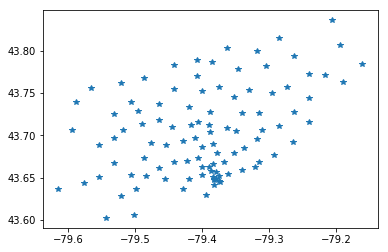

In [14]:
#Toronto_p[['Latitude',	'Longitude']].plot(kind = "line")
y = np.array(Toronto.Latitude)
x = np.array(Toronto.Longitude)

plt.plot(x,y,'*')

# Question 3 - K-Means Clustring

In [18]:
#from sklearn.preprocessing import StandardScaler
#################################
# drop the unwanted columns
#################################
#X = df.values[:,1:]
#X = np.nan_to_num(X)
#cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset
################################
#num_clusters = 3
#k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
#k_means.fit(cluster_dataset)
#labels = k_means.labels_
#print(labels)
################################
#df["Labels"] = labels
#df.head(5)
################################
#df.groupby('Labels').mean()

In [16]:
CLIENT_ID = 'G253PXG12IIBGKJORQ10VS3DZ3CI4XHNWMVELQYL4F0RLAAL' # your Foursquare ID
CLIENT_SECRET = 'ANVOUGNXBEDHLQ1WESVHUYD1GAL3OJMHEW5Q1UMMHNAEXBO0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G253PXG12IIBGKJORQ10VS3DZ3CI4XHNWMVELQYL4F0RLAAL
CLIENT_SECRET:ANVOUGNXBEDHLQ1WESVHUYD1GAL3OJMHEW5Q1UMMHNAEXBO0


In [19]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [20]:
neighborhood_latitude = Toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


In [21]:
# type your answer here
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=G253PXG12IIBGKJORQ10VS3DZ3CI4XHNWMVELQYL4F0RLAAL&client_secret=ANVOUGNXBEDHLQ1WESVHUYD1GAL3OJMHEW5Q1UMMHNAEXBO0&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4b863ad69ed0003811c8eb'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Manhattan

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
Toronto_venues = getNearbyVenues(names=Toronto['Neighborhood'],
                                   latitudes=Toronto['Latitude'],
                                   longitudes=Toronto['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [28]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2250, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum


In [29]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",10,10,10,10,10,10
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
Berczy Park,56,56,56,56,56,56


In [30]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 279 uniques categories.


## 3. Analyze Each Neighborhood

In [31]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,

In [32]:
Toronto_onehot.shape

(2250, 279)

In [33]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide,

In [34]:
Toronto_grouped.shape

(101, 279)

In [35]:
# Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2              Bar  0.04
3       Steakhouse  0.04
4  Thai Restaurant  0.04


----Agincourt----
            venue  freq
0  Breakfast Spot  0.25
1          Lounge  0.25
2    Skating Rink  0.25
3  Clothing Store  0.25
4     Yoga Studio  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                venue  freq
0          Playground  0.33
1         Coffee Shop  0.33
2                Park  0.33
3         Men's Store  0.00
4  Mexican Restaurant  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                 venue  freq
0          Pizza Place   0.2
1        Grocery Store   0.2
2           Beer Store   0.1
3       Sandwich Place   0.1
4  Fried Chicken Joint   0.1


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place   0.2
1     Coffee Shop   0.1
2        Pharmacy  

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Hotel,Breakfast Spot,Gym,Asian Restaurant,Restaurant
1,Agincourt,Breakfast Spot,Lounge,Skating Rink,Clothing Store,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Coffee Shop,Women's Store,Drugstore,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Fried Chicken Joint,Coffee Shop,Sandwich Place,Pharmacy,Beer Store,Fast Food Restaurant,Gluten-free Restaurant,Deli / Bodega
4,"Alderwood, Long Branch",Pizza Place,Pool,Gym,Skating Rink,Pharmacy,Coffee Shop,Pub,Athletics & Sports,Sandwich Place,Dive Bar


## 4. Cluster Neighborhoods

In [38]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood',axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 3, 3, 0, 0, 0, 0, 0])

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Toronto_merged.dropna(subset=["Cluster Labels"],axis=0,inplace=True)

Toronto_merged # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3.0,Fast Food Restaurant,Print Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dessert Shop
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,Golf Course,History Museum,Bar,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,3.0,Pizza Place,Breakfast Spot,Rental Car Location,Medical Center,Electronics Store,Mexican Restaurant,Intersection,Doner Restaurant,Discount Store,Dive Bar
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Coffee Shop,Insurance Office,Korean Restaurant,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Bakery,Hakka Restaurant,Bank,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Fried Chicken Joint,Donut Shop,Dive Bar,Dog Run
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,4.0,Playground,Convenience Store,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0.0,Discount Store,Department Store,Convenience Store,Coffee Shop,Chinese Restaurant,Women's Store,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,3.0,Bus Line,Bakery,Fast Food Restaurant,Soccer Field,Bus Station,Intersection,Park,Convenience Store,Falafel Restaurant,Event Space
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,Motel,American Restaurant,Women's Store,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,Café,General Entertainment,Skating Rink,College Stadium,Concert Hall,Construction & Landscaping,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

### Cluster 1

In [42]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,0.0,Golf Course,History Museum,Bar,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,Scarborough,0.0,Coffee Shop,Insurance Office,Korean Restaurant,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
4,Scarborough,0.0,Bakery,Hakka Restaurant,Bank,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Fried Chicken Joint,Donut Shop,Dive Bar,Dog Run
6,Scarborough,0.0,Discount Store,Department Store,Convenience Store,Coffee Shop,Chinese Restaurant,Women's Store,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop
9,Scarborough,0.0,Café,General Entertainment,Skating Rink,College Stadium,Concert Hall,Construction & Landscaping,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant
10,Scarborough,0.0,Indian Restaurant,Pet Store,Vietnamese Restaurant,Light Rail Station,Latin American Restaurant,Chinese Restaurant,Donut Shop,Discount Store,Dive Bar,Dog Run
11,Scarborough,0.0,Middle Eastern Restaurant,Breakfast Spot,Auto Garage,Bakery,Sandwich Place,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
12,Scarborough,0.0,Breakfast Spot,Lounge,Skating Rink,Clothing Store,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
18,North York,0.0,Clothing Store,Fast Food Restaurant,Coffee Shop,Women's Store,Toy / Game Store,Bakery,Asian Restaurant,Tea Room,Electronics Store,Japanese Restaurant
19,North York,0.0,Japanese Restaurant,Café,Bank,Chinese Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Women's Store


### Cluster 2

In [43]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,North York,1.0,Cafeteria,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Women's Store,Diner


### Cluster 3

In [44]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,North York,2.0,Piano Bar,Drugstore,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Fast Food Restaurant


### Cluster 4

In [45]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,3.0,Fast Food Restaurant,Print Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dessert Shop
2,Scarborough,3.0,Pizza Place,Breakfast Spot,Rental Car Location,Medical Center,Electronics Store,Mexican Restaurant,Intersection,Doner Restaurant,Discount Store,Dive Bar
7,Scarborough,3.0,Bus Line,Bakery,Fast Food Restaurant,Soccer Field,Bus Station,Intersection,Park,Convenience Store,Falafel Restaurant,Event Space
8,Scarborough,3.0,Motel,American Restaurant,Women's Store,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
13,Scarborough,3.0,Pizza Place,Bank,Thai Restaurant,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Shopping Mall,Breakfast Spot,Noodle House,Italian Restaurant
15,Scarborough,3.0,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Pizza Place,Nail Salon,Camera Store,Sandwich Place,Breakfast Spot,Pharmacy,Grocery Store
17,North York,3.0,Fast Food Restaurant,Mediterranean Restaurant,Pool,Dog Run,Golf Course,Drugstore,Discount Store,Dive Bar,Doner Restaurant,Donut Shop
24,North York,3.0,Pizza Place,Grocery Store,Coffee Shop,Butcher,Discount Store,Pharmacy,Greek Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
31,North York,3.0,Grocery Store,Bank,Park,Shopping Mall,Hotel,Women's Store,Drugstore,Discount Store,Dive Bar,Dog Run
33,North York,3.0,Discount Store,Gym / Fitness Center,Grocery Store,Athletics & Sports,Liquor Store,Women's Store,Drugstore,Dive Bar,Dog Run,Doner Restaurant


### Cluster 5

In [46]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,4.0,Playground,Convenience Store,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
14,Scarborough,4.0,Playground,Park,Coffee Shop,Women's Store,Drugstore,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
23,North York,4.0,Bank,Park,Convenience Store,Flower Shop,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
25,North York,4.0,Food & Drink Shop,Park,Fast Food Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Diner
30,North York,4.0,Airport,Park,Women's Store,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
40,East York,4.0,Park,Pizza Place,Convenience Store,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
44,Central Toronto,4.0,Lake,Swim School,Park,Bus Line,Drugstore,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Women's Store
48,Central Toronto,4.0,Playground,Restaurant,Park,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run
50,Downtown Toronto,4.0,Park,Building,Playground,Trail,Women's Store,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
64,Central Toronto,4.0,Trail,Sushi Restaurant,Park,Jewelry Store,Women's Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
